In [37]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [38]:
DIRvor="/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-REF08-S/DIAGS/REL-VORT/2015/"
DIRvorWind="/data0/project/drakkar/USERS/cassianides/creg12/contribution_icurl/2015/"


In [39]:
INGRD="/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/"
ds_grd=xr.open_dataset(INGRD+'CREG12.L75-REF08_mask.nc')

In [40]:
ds_grd

<xarray.Dataset>
Dimensions:       (t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
Attributes:
    file_name:  mask.nc
    TimeStamp:  06/06/2019 11:12:46 +0200

In [41]:
ds_OceVor=xr.open_dataset(DIRvor+'CREG12.L75-REF08_y2015m07d05.5d_OceXi.nc')
ds_IceVor=xr.open_dataset(DIRvor+'CREG12.L75-REF08_y2015m07d05.5d_IceXi.nc')
ds_OceVor

<xarray.Dataset>
Dimensions:       (depthu: 75, time_counter: 1, x: 1580, y: 1801)
Coordinates:
  * depthu        (depthu) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) object 2015-07-03 12:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    socurl        (time_counter, depthu, y, x) float32 ...
Attributes:
    start_date:        19790101
    output_frequency:  5d
    CONFIG:            CREG12.L75
    CASE:              REF08

In [42]:
ds_IceVor

<xarray.Dataset>
Dimensions:       (time_counter: 1, unknown: 1, x: 1580, y: 1801)
Coordinates:
  * unknown       (unknown) float32 0.0
  * time_counter  (time_counter) object 2015-07-03 12:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    socurl        (time_counter, y, x) float32 ...
Attributes:
    start_date:        19790101
    output_frequency:  5d
    CONFIG:            CREG12.L75
    CASE:              REF08

In [43]:
ds_WndVor=xr.open_dataset(DIRvorWind+'CREG12.L75-REF08_y2015m07d05.5d_WindVeloCurl.nc')
ds_WndVor

<xarray.Dataset>
Dimensions:       (depthu: 1, time_counter: 1, x: 1580, y: 1801)
Coordinates:
  * depthu        (depthu) float32 0.0
  * time_counter  (time_counter) object 2015-07-03 12:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    socurl        (time_counter, y, x) float32 ...
Attributes:
    start_date:        19790101
    output_frequency:  5d
    CONFIG:            CREG12.L75
    CASE:              REF08

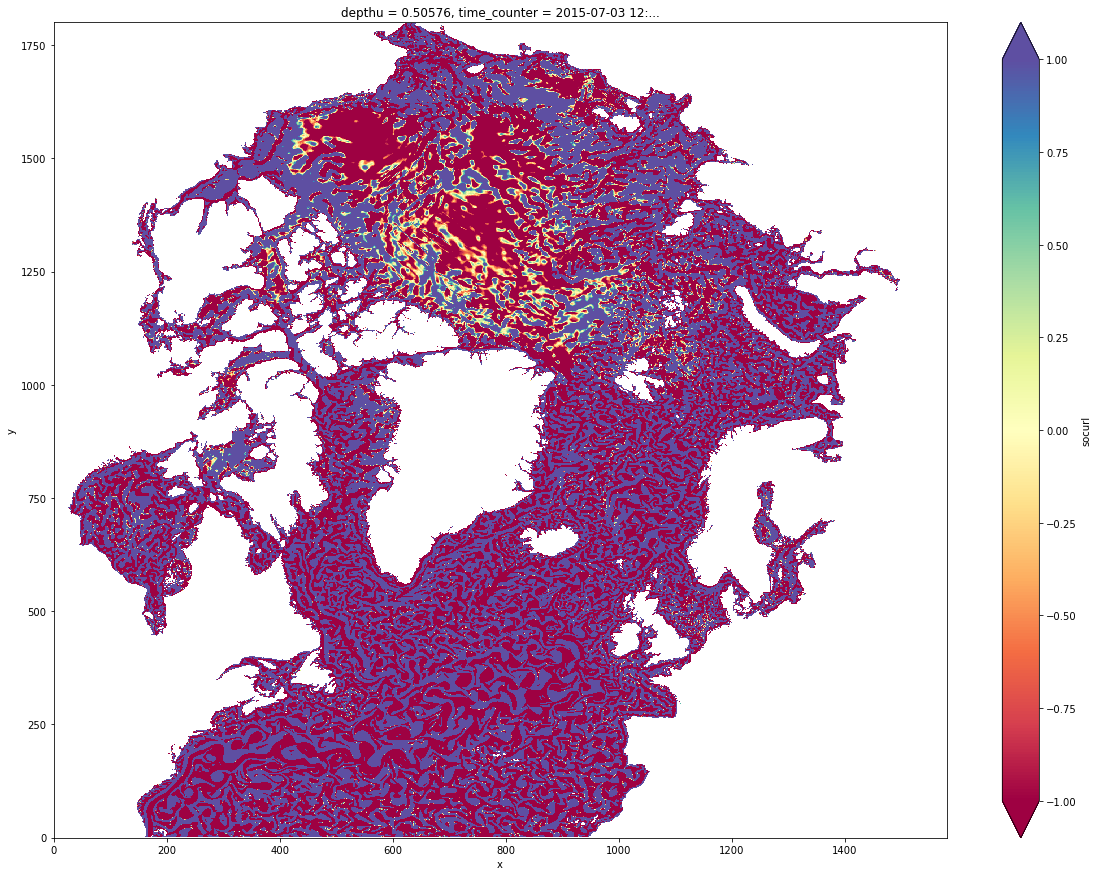

In [50]:
plt.figure(figsize=(20,15))
m_alpha=1e+7
(ds_OceVor['socurl'].isel(depthu=0)*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

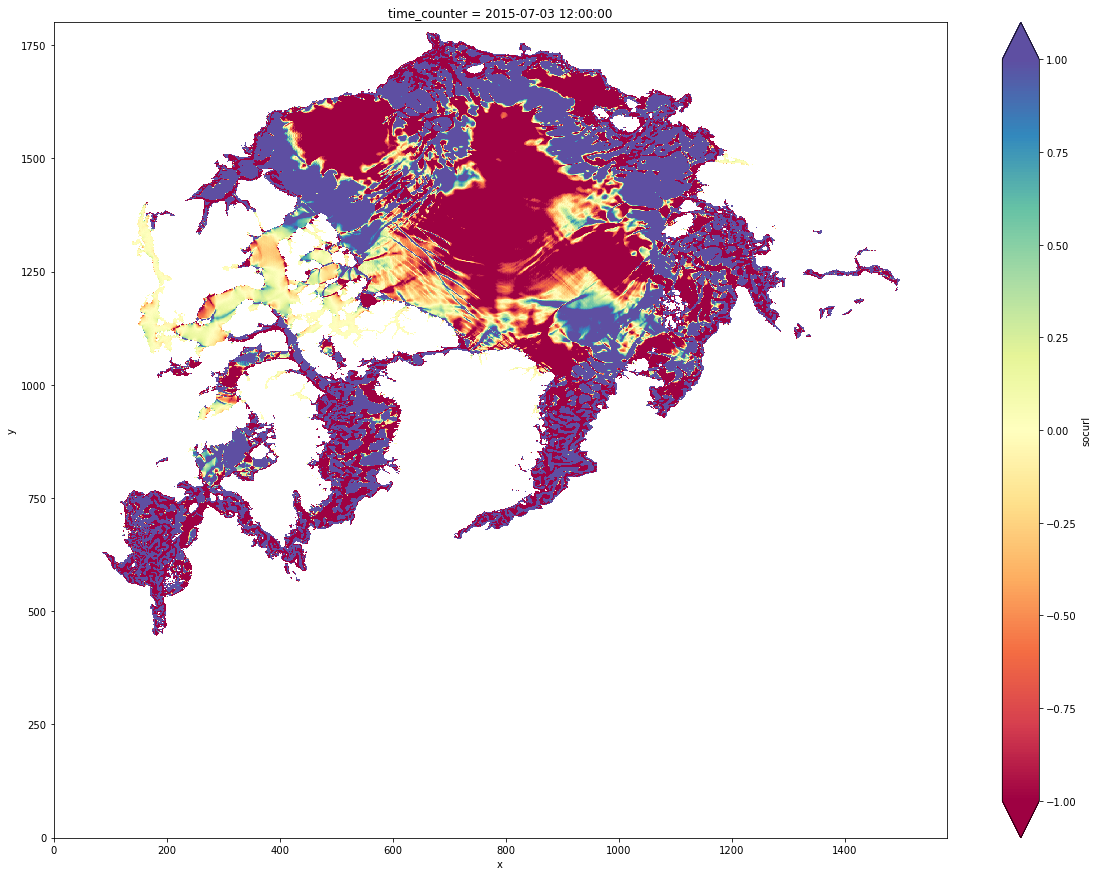

In [30]:
plt.figure(figsize=(20,15))
m_alpha=1e+7
(ds_IceVor['socurl']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

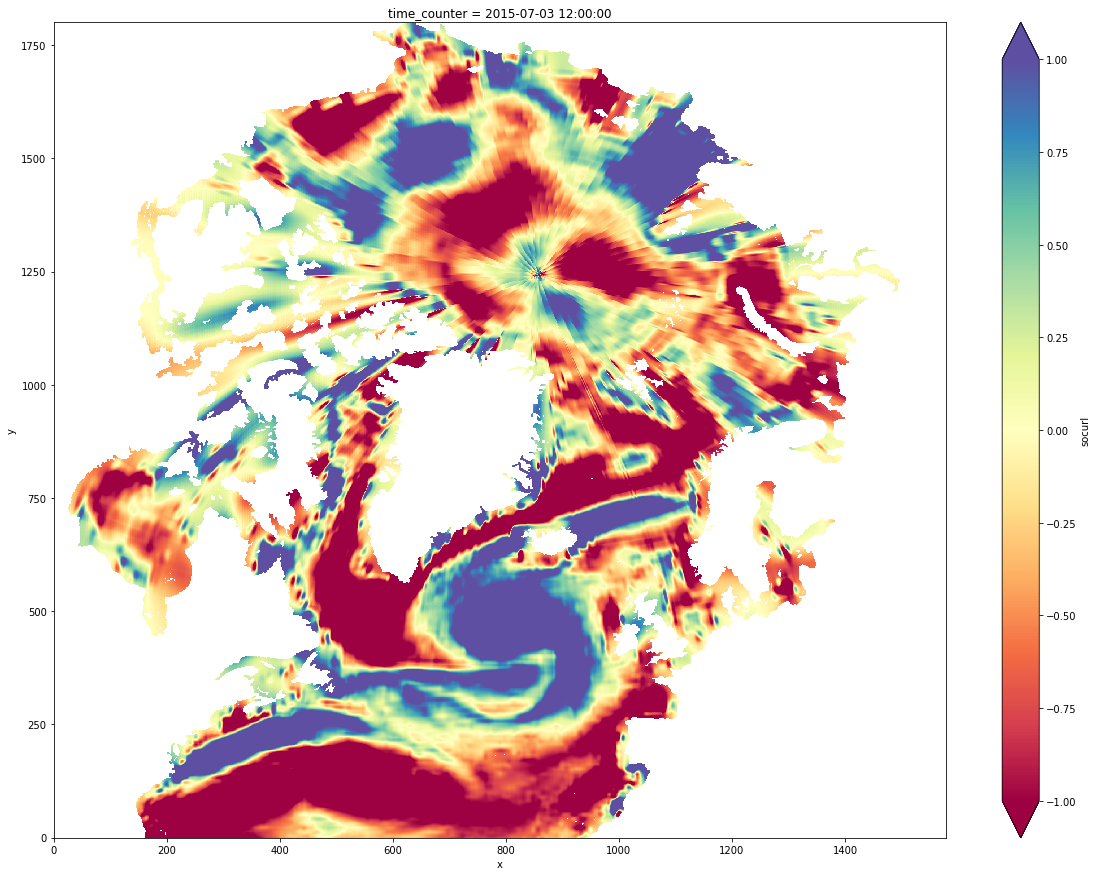

In [44]:
plt.figure(figsize=(20,15))
m_alpha=1e+5
(ds_WndVor['socurl']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

In [45]:
ds_WndVor['socurl']=xr.where(np.isnan(ds_WndVor['socurl']), 0., ds_WndVor['socurl']*ds_grd['fmask'][0,0,:,:])

In [52]:
ds_WndVor['socurl'].max?

In [ ]:
ds_WndVor['socurl'].max

In [50]:
print(kmax)

<xarray.DataArray 'socurl' ()>
array(1.2644533e+17, dtype=float32)


In [47]:
ds_WndVor['socurl'].min()

<xarray.DataArray 'socurl' ()>
array(-1.24127115e+17, dtype=float32)

In [78]:
cond1=xr.where(ds_WndVor['socurl'] > 1e+6, 0., ds_WndVor['socurl'] )
cond2=xr.where(ds_WndVor['socurl'] < -1e+6, 0., cond1 )
cond=xr.where( (ds_WndVor['socurl'] > 1e+6) | (ds_WndVor['socurl'] < -1e+6), 0., ds_WndVor['socurl'])

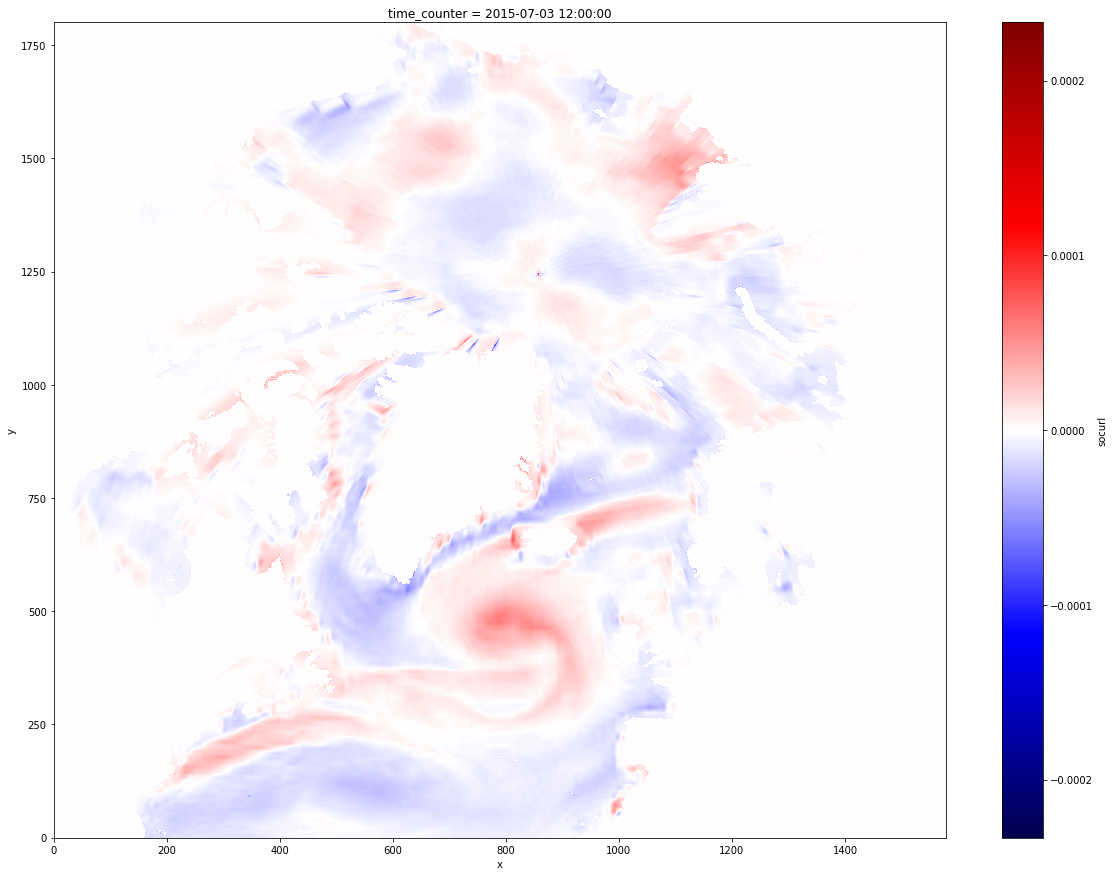

In [79]:
plt.figure(figsize=(20,15))
m_alpha=1.
(cond*m_alpha).plot(cmap='seismic') #vmin=-1.,vmax=1.,cmap='seismic')

In [76]:
print(cond2.min())

<xarray.DataArray 'socurl' ()>
array(-0.00023336, dtype=float32)


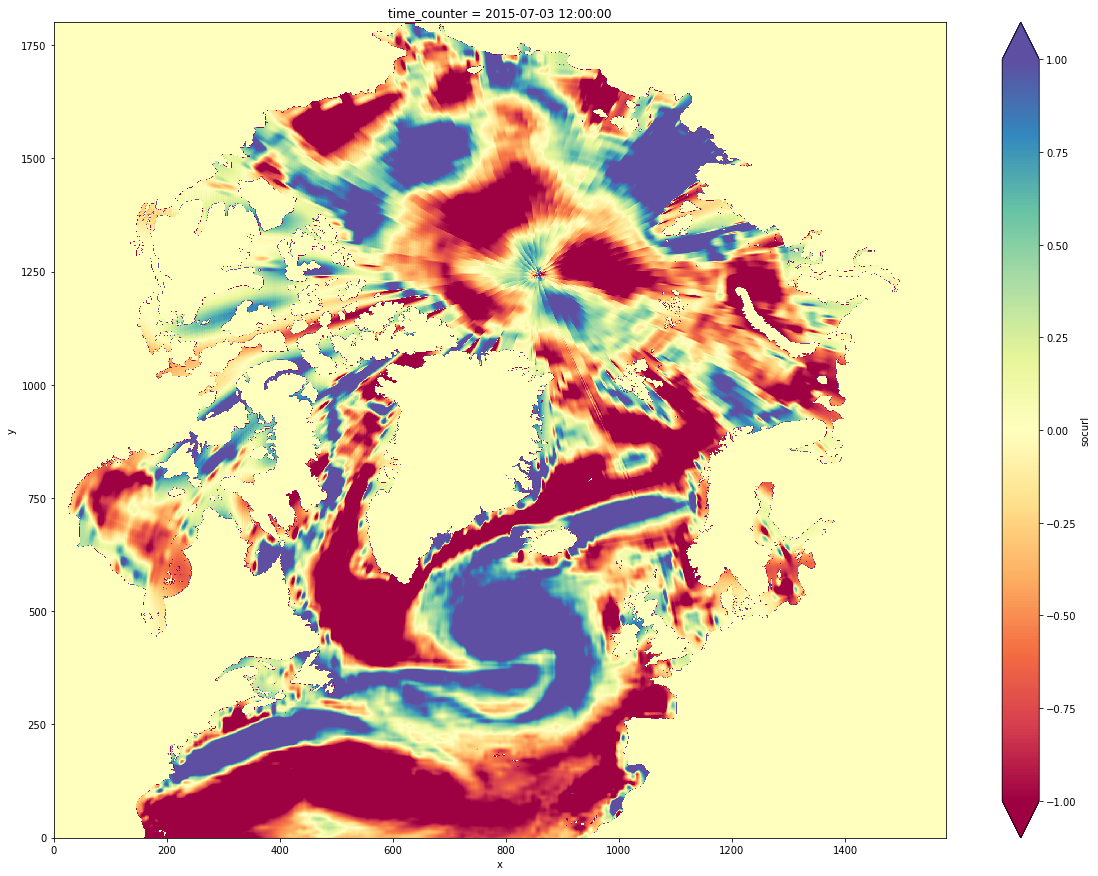

In [46]:
plt.figure(figsize=(20,15))
m_alpha=1e+5
(ds_WndVor['socurl']*m_alpha).plot(vmin=-1.,vmax=1.,cmap='Spectral')

In [ ]:
plt.figure(figsize=(20,15))
m_alpha=1e+5
(ds_WndVor['socurl']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

In [8]:
ds_wndMine=xr.open_dataset('/home/ctalandi/PREPOST/CURL/REF08/CREG12.L75-REF08_y2015m07d05.5d_WS10.nc')

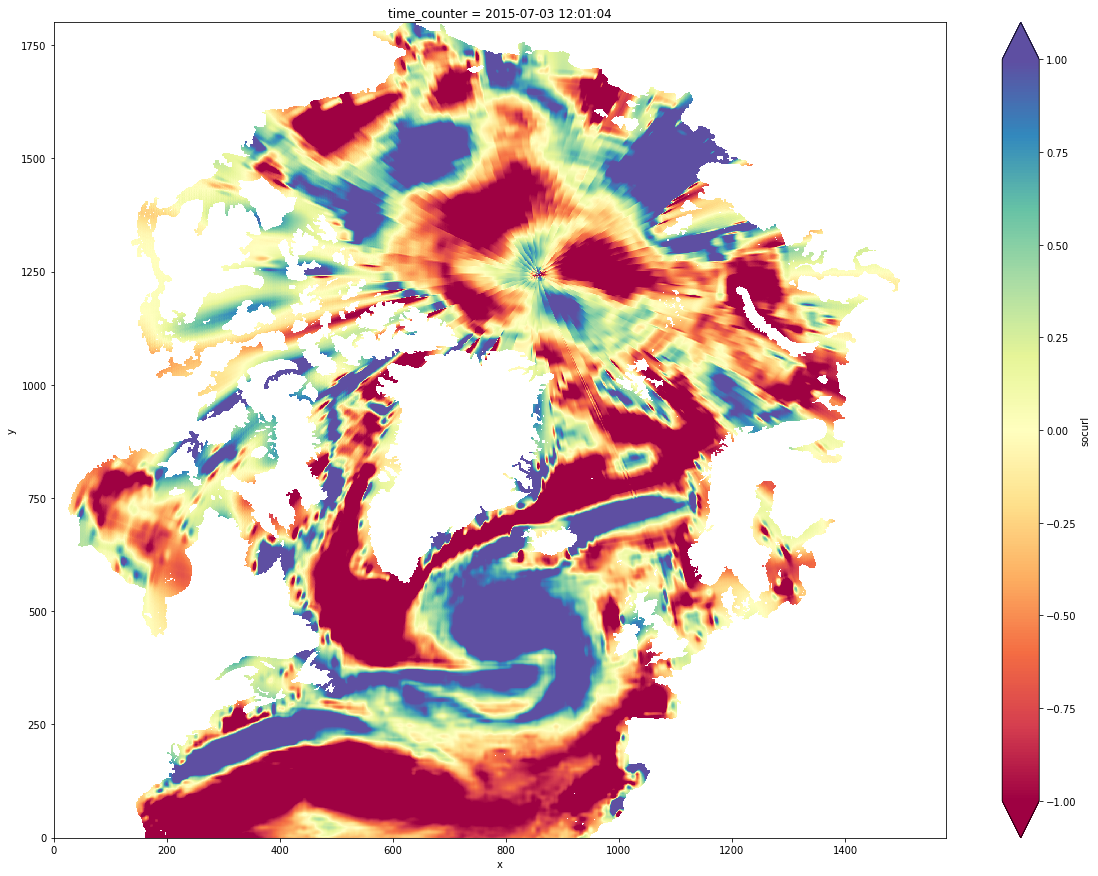

In [9]:
plt.figure(figsize=(20,15))
m_alpha=1e+5
(ds_wndMine['socurl']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

In [21]:
ds_WndVor['socurlmsk']=(('time_counter','y','x'),\
                        xr.where(np.isnan(np.array(ds_WndVor['socurl'])), 0., \
                                 np.array(ds_WndVor['socurl']*ds_grd['fmask'][0,0,:,:])))
                       
ds_WndVor

<xarray.Dataset>
Dimensions:       (depthu: 1, time_counter: 1, x: 1580, y: 1801)
Coordinates:
  * depthu        (depthu) float32 0.0
  * time_counter  (time_counter) object 2015-07-03 12:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    socurl        (time_counter, y, x) float32 nan nan nan nan ... nan nan nan
    socurlmsk     (time_counter, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    start_date:        19790101
    output_frequency:  5d
    CONFIG:            CREG12.L75
    CASE:              REF08

In [22]:
ds_WndVor.to_netcdf('./windcurl_msk.nc')

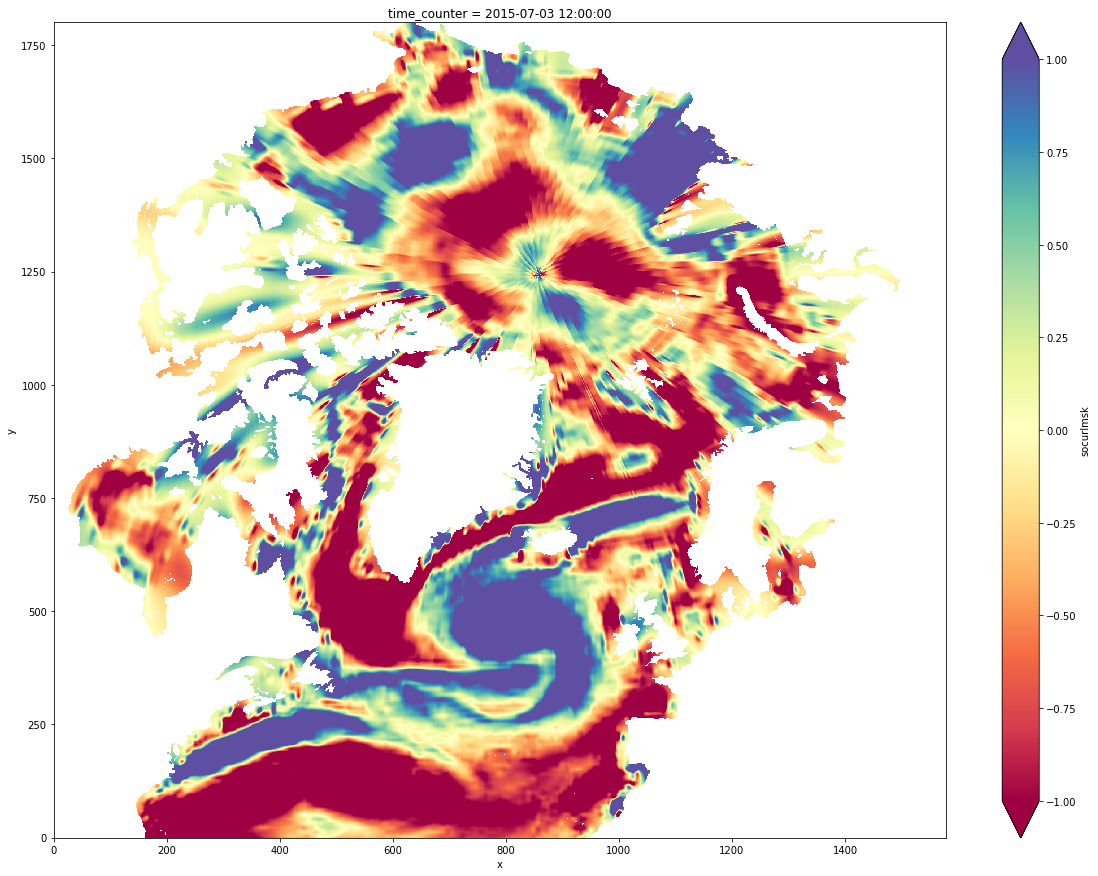

In [14]:
plt.figure(figsize=(20,15))
m_alpha=1e+5
(ds_WndVor['socurlmsk']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

In [15]:
ds_grd

<xarray.Dataset>
Dimensions:       (t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
Attributes:
    file_name:  mask.nc
    TimeStamp:  06/06/2019 11:12:46 +0200

>> # Smoothed fields 

In [9]:
DIRShapi="/data0/project/drakkar/USERS/cassianides/creg12/shapiro/curl/2015/"
ds_OceVorSM=xr.open_dataset(DIRShapi+'smooth_CREG12.L75-REF08_y2015m07d05_itpshap300OceXi.nc')
ds_IceVorSM=xr.open_dataset(DIRShapi+'smooth_CREG12.L75-REF08_y2015m07d05_itpshap300IceXi.nc')
ds_WndVorSM=xr.open_dataset(DIRShapi+'smooth_CREG12.L75-REF08_y2015m07d05_itpshap300WindXi.nc')
ds_OceVorSM

<xarray.Dataset>
Dimensions:     (x: 1580, y: 1801)
Dimensions without coordinates: x, y
Data variables:
    icurl_smo   (y, x) float32 ...
    icurl_diff  (y, x) float32 ...

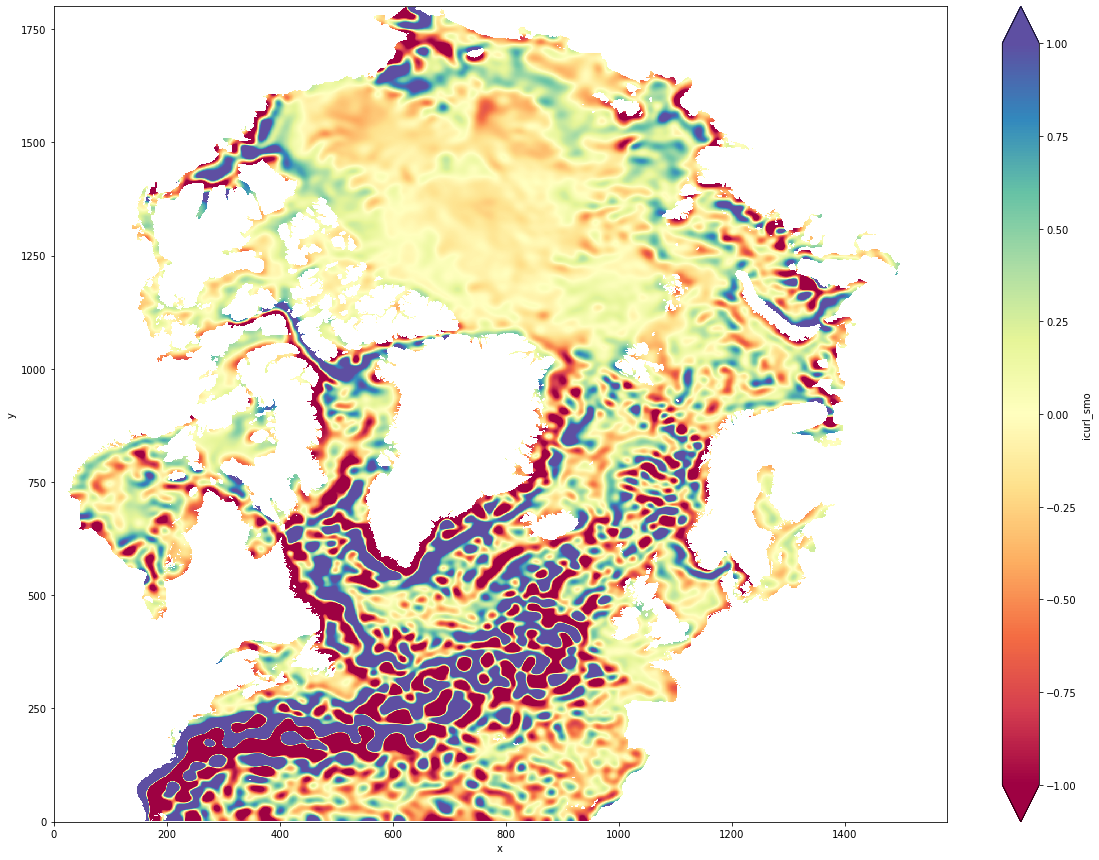

In [21]:
plt.figure(figsize=(20,15))
m_alpha=1e+6
(ds_OceVorSM['icurl_smo']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

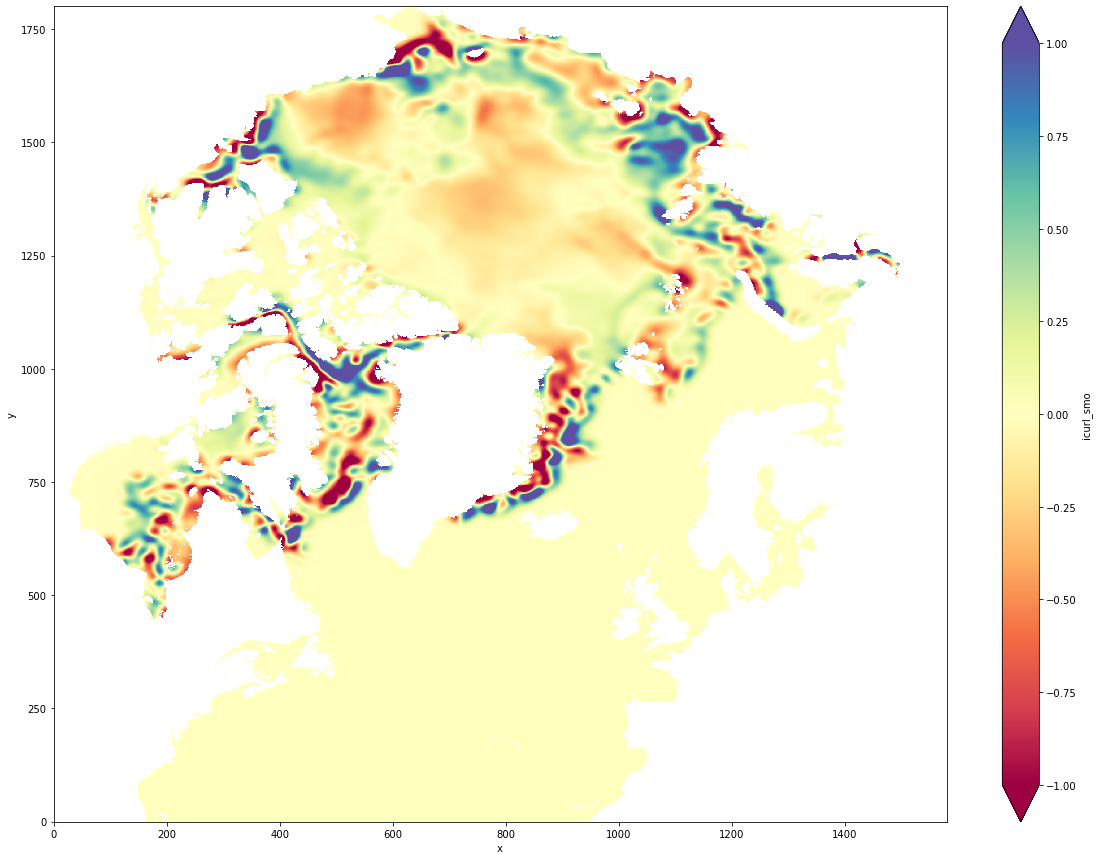

In [11]:
plt.figure(figsize=(20,15))
m_alpha=1e+6
(ds_IceVorSM['icurl_smo']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

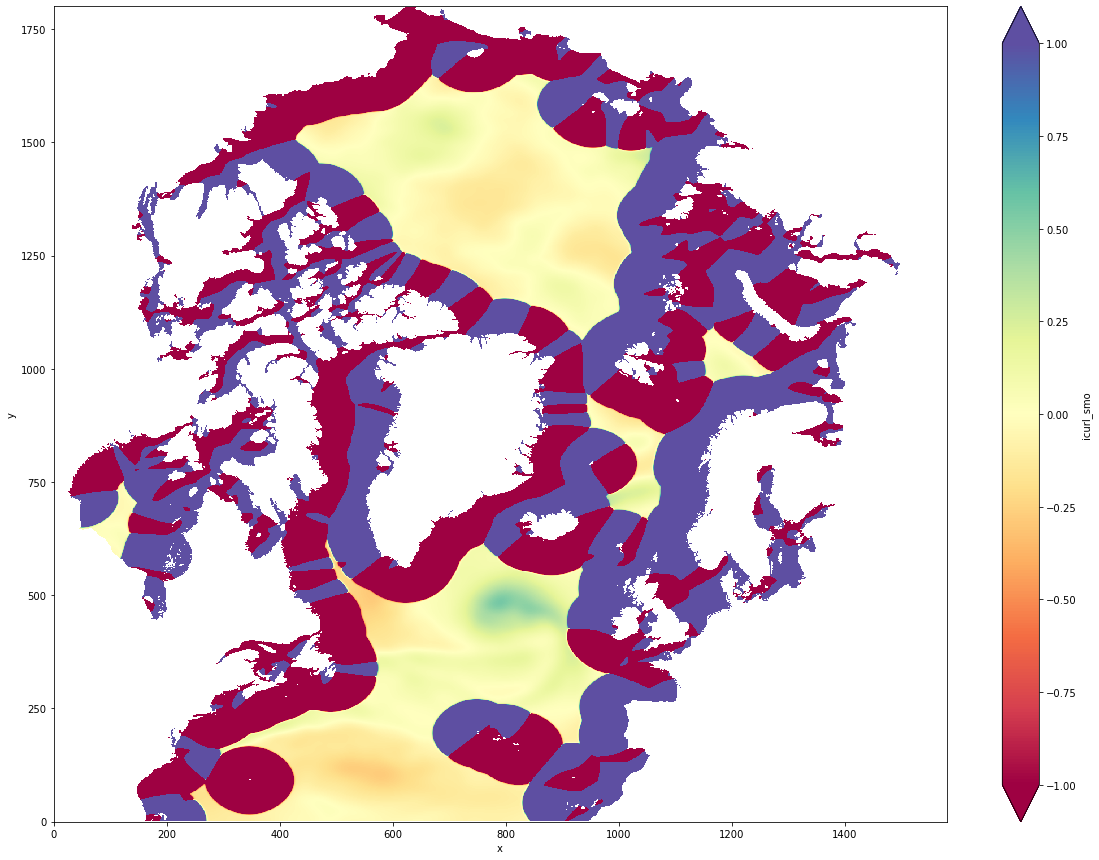

In [19]:
plt.figure(figsize=(20,15))
m_alpha=1e+4
(ds_WndVorSM['icurl_smo']*m_alpha).where(ds_grd['fmask'].isel(z=0) == 1.).plot(vmin=-1.,vmax=1.,cmap='Spectral')

In [ ]:
vmin=400. ; vmax=1000. ; vint=50.
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]

plt.figure(figsize=(20,15))
plt.subplot(111)
Arc_plot(np.array(ds_sedna_bat['nav_lon']),np.array(ds_sedna_bat['nav_lat']), \
         (xr.where(tmask ==0., np.nan,ds_coord['e1t'])), contours, limits)
#plt.text(0.7,0.9,'SEDNA horizontal grid resolution',fontsize=15)

